In [66]:
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 80)
pd.reset_option('display.float_format')



In [187]:
test_df = pd.read_csv('fraudtest.csv', parse_dates=['trans_date_trans_time', 'dob'])
train_df = pd.read_csv('fraudtrain.csv', parse_dates=['trans_date_trans_time', 'dob'])
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
df = (df.drop(columns='Unnamed: 0')
        .reset_index(drop=True)
        )

## Review raw data

In [189]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Check for missing values and zeros
No missing values found

In [190]:
df.isna().sum().sum()

0

No unexpected/excessive zeros in feature columns

In [191]:
(df==0).sum()

trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                 1842743
dtype: int64

## Review descriptive statistics - ALL Data

In [76]:
(df
    .describe()
    .round(3)
    )

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1.852394e+06,1852394.000,1852394.000,1852394.000
mean,4.173860e+17,70.064,48813.258,38.539,-90.228,88643.675,1.358674e+09,38.539,-90.228,0.005
std,1.309115e+18,159.254,26881.846,5.071,13.748,301487.618,1.819508e+07,5.106,13.760,0.072
min,6.041621e+10,1.000,1257.000,20.027,-165.672,23.000,1.325376e+09,19.027,-166.672,0.000
25%,1.800429e+14,9.640,26237.000,34.669,-96.798,741.000,1.343017e+09,34.740,-96.899,0.000
50%,3.521417e+15,47.450,48174.000,39.354,-87.477,2443.000,1.357089e+09,39.369,-87.441,0.000
75%,4.642255e+15,83.100,72042.000,41.940,-80.158,20328.000,1.374581e+09,41.956,-80.245,0.000
max,4.992346e+18,28948.900,99921.000,66.693,-67.950,2906700.000,1.388534e+09,67.510,-66.951,1.000


## Review descriptive statistics - Classes
Notable:

amt
- Max is much higher for non fraud  $28,948 >> $13,076
- Average fraud amt is much higher $530 >> $67
- Both are right skewed mean > median at a ratio of roughly 0.7

city_pop
- Surprisingly similar - could indicate city size not a predictor

NON-FRAUD

In [162]:
(df[df.is_fraud == 0]
    .describe()
    .round(3)
    )

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.842743e+06,1842743.000,1842743.000,1842743.000,1842743.000,1842743.000,1.842743e+06,1842743.000,1842743.000,1842743.0
mean,4.174926e+17,67.651,48817.519,38.538,-90.229,88636.579,1.358692e+09,38.538,-90.229,0.0
std,1.309282e+18,153.548,26880.425,5.071,13.745,301462.369,1.819482e+07,5.105,13.757,0.0
min,6.041621e+10,1.000,1257.000,20.027,-165.672,23.000,1.325376e+09,19.027,-166.672,0.0
25%,1.800429e+14,9.610,26237.000,34.669,-96.798,741.000,1.343045e+09,34.738,-96.901,0.0
50%,3.521417e+15,47.240,48174.000,39.354,-87.477,2443.000,1.357123e+09,39.368,-87.442,0.0
75%,4.642255e+15,82.560,72042.000,41.940,-80.158,20328.000,1.374604e+09,41.956,-80.247,0.0
max,4.992346e+18,28948.900,99783.000,65.690,-67.950,2906700.000,1.388534e+09,66.683,-66.951,0.0


FRAUD

In [163]:
(df[df.is_fraud == 1]
    .describe()
    .round(3)
    )

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9.651000e+03,9651.000,9651.000,9651.000,9651.000,9651.000,9.651000e+03,9651.000,9651.000,9651.0
mean,3.970393e+17,530.661,47999.638,38.743,-90.034,89998.423,1.355323e+09,38.735,-90.038,1.0
std,1.276696e+18,391.029,27140.976,5.153,14.250,306283.338,1.793362e+07,5.193,14.269,0.0
min,6.041621e+10,1.060,1257.000,20.027,-165.672,23.000,1.325466e+09,19.162,-166.551,1.0
25%,1.800174e+14,240.075,24433.000,35.043,-96.727,795.000,1.339520e+09,35.087,-96.678,1.0
50%,3.521261e+15,390.000,46946.000,39.537,-87.044,2693.000,1.355276e+09,39.516,-87.168,1.0
75%,4.603179e+15,902.365,70447.000,42.076,-79.940,19054.000,1.370567e+09,42.043,-79.907,1.0
max,4.992346e+18,1376.040,99921.000,66.693,-67.950,2906700.000,1.387754e+09,67.510,-66.961,1.0


## Review datatypes to reduce file size and speed analysis
Train and test files combined are roughly 500MB, however pandas creates significant overhead 

Objects and 64 byte datatypes are candidates to be converted to catagorical or smaller float/int datatypes

**TLDR**: This step reduced the dataframe by 400MB (40%) - faster analysis, modeling, and time to value

In [192]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

Memory consumption of each column

In [230]:
# returned in bytes so dividing by 1,000,000 to return MB
display("Memory use by column (MB)",
        (df.memory_usage(deep=True)/1000000).round(1), 
        f"Total (MB): {(df.memory_usage(deep=True).sum()/1000000).round(1)}"
)

'Memory use by column (MB)'

Index                      0.0
trans_date_trans_time     14.8
cc_num                    14.8
merchant                 148.4
category                 125.1
amt                       14.8
first                    116.8
last                     116.9
gender                   110.8
street                   146.8
city                     121.6
state                    109.3
zip                       14.8
lat                       14.8
long                      14.8
city_pop                  14.8
job                      143.1
dob                       14.8
trans_num                164.9
unix_time                 14.8
merch_lat                 14.8
merch_long                14.8
is_fraud                  14.8
dtype: float64

'Total (MB): 1481.5'

I want evaluate the uniqueness of trans_num by seeing how many char have to be
removed from the left and right before they are no longer unique 

This feature could identify certain credit card processing device brands or be a way to 
cluster transactions in another way

It appears to be very unique so it will be dropped in the next step

In [222]:
for num in range(len(df.trans_num[0])):
    test_trans = df.trans_num
    l_strip_test_trans = test_trans.str[num:]
    r_strip_test_trans = test_trans.str[:-num]
    num_test_trans = len(test_trans)

    if l_strip_test_trans.nunique() - num_test_trans != 0:
        print(f"Left stripped digits: {num}, Unique trans_num:",
              len(test_trans) - l_strip_test_trans.nunique()
              )
    if r_strip_test_trans.nunique() - num_test_trans != 0:
        
        print(f"Right stripped digits: {num}, Unique trans_num:", 
              len(test_trans) - r_strip_test_trans.nunique()
        )

Right stripped digits: 0, Unique trans_num: 1852393
Left stripped digits: 22, Unique trans_num: 4
Right stripped digits: 22, Unique trans_num: 1
Left stripped digits: 23, Unique trans_num: 21
Right stripped digits: 23, Unique trans_num: 29
Left stripped digits: 24, Unique trans_num: 419
Right stripped digits: 24, Unique trans_num: 387
Left stripped digits: 25, Unique trans_num: 6222
Right stripped digits: 25, Unique trans_num: 6210
Left stripped digits: 26, Unique trans_num: 97980
Right stripped digits: 26, Unique trans_num: 98171
Left stripped digits: 27, Unique trans_num: 982881
Right stripped digits: 27, Unique trans_num: 983209
Left stripped digits: 28, Unique trans_num: 1786858
Right stripped digits: 28, Unique trans_num: 1786858
Left stripped digits: 29, Unique trans_num: 1848298
Right stripped digits: 29, Unique trans_num: 1848298
Left stripped digits: 30, Unique trans_num: 1852138
Right stripped digits: 30, Unique trans_num: 1852138
Left stripped digits: 31, Unique trans_num: 1

Tightening datatypes to reduce memory footprint

Although some columns (merchant, city) could have been converted to categorical,
I chose not to convert them since they would not have been able to scale to production 
with that datatype

Dropping trans_num (see previous cell) and unix_time since we have a datetime
column that will likely be split into date and time in feature engineering

In [231]:
mem_df = (df
        .assign(
                category = df.category.astype('category'), # 14 unique
                amt = df.amt.astype('float32'), # min/max within dtype
                gender = df.gender.astype('category'), # Two values (M/F) 
                state = df.state.astype('category'), # 51 including DC
                zip = df.zip.astype('uint32'), # non-neg and max in dtype
                city_pop = df.city_pop.astype('uint32'), # non-neg and max in dtype
                is_fraud = df.is_fraud.astype('category') 
                )
        .drop(columns=['unix_time', 'trans_num']) # date/time already captured 
        ).copy(deep = True)

Confirming numeric values and precision are not meaningfully affected

In [232]:
df.loc[:, df.columns != 'is_fraud'].describe() - dtype_trimmed_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
count,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,6.989546e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,7.488827e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,-3.433228e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,-7.629395e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.525879e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,-3.906250e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Results of datatype tightening

In [226]:
prev_df_mem = (df.memory_usage(deep=True).sum()/1000000).round(1)
tight_df_mem = (mem_df.memory_usage(deep=True).sum()/1000000).round(1)
percent_reduction = (1 - tight_df_mem/ prev_df_mem).round(1)*100

print(f'Raw dataframe (MB): {prev_df_mem} - Tightened dataframe (MB): {tight_df_mem}')
print(f"Percent reduction {percent_reduction}%")

Raw dataframe (MB): 1481.5 - Tightened dataframe (MB): 927.0
Percent reduction 40.0%


## Plot numeric data
Not fraud

In [ ]:
sns.pairplot(
    df[df.is_fraud==0]
)

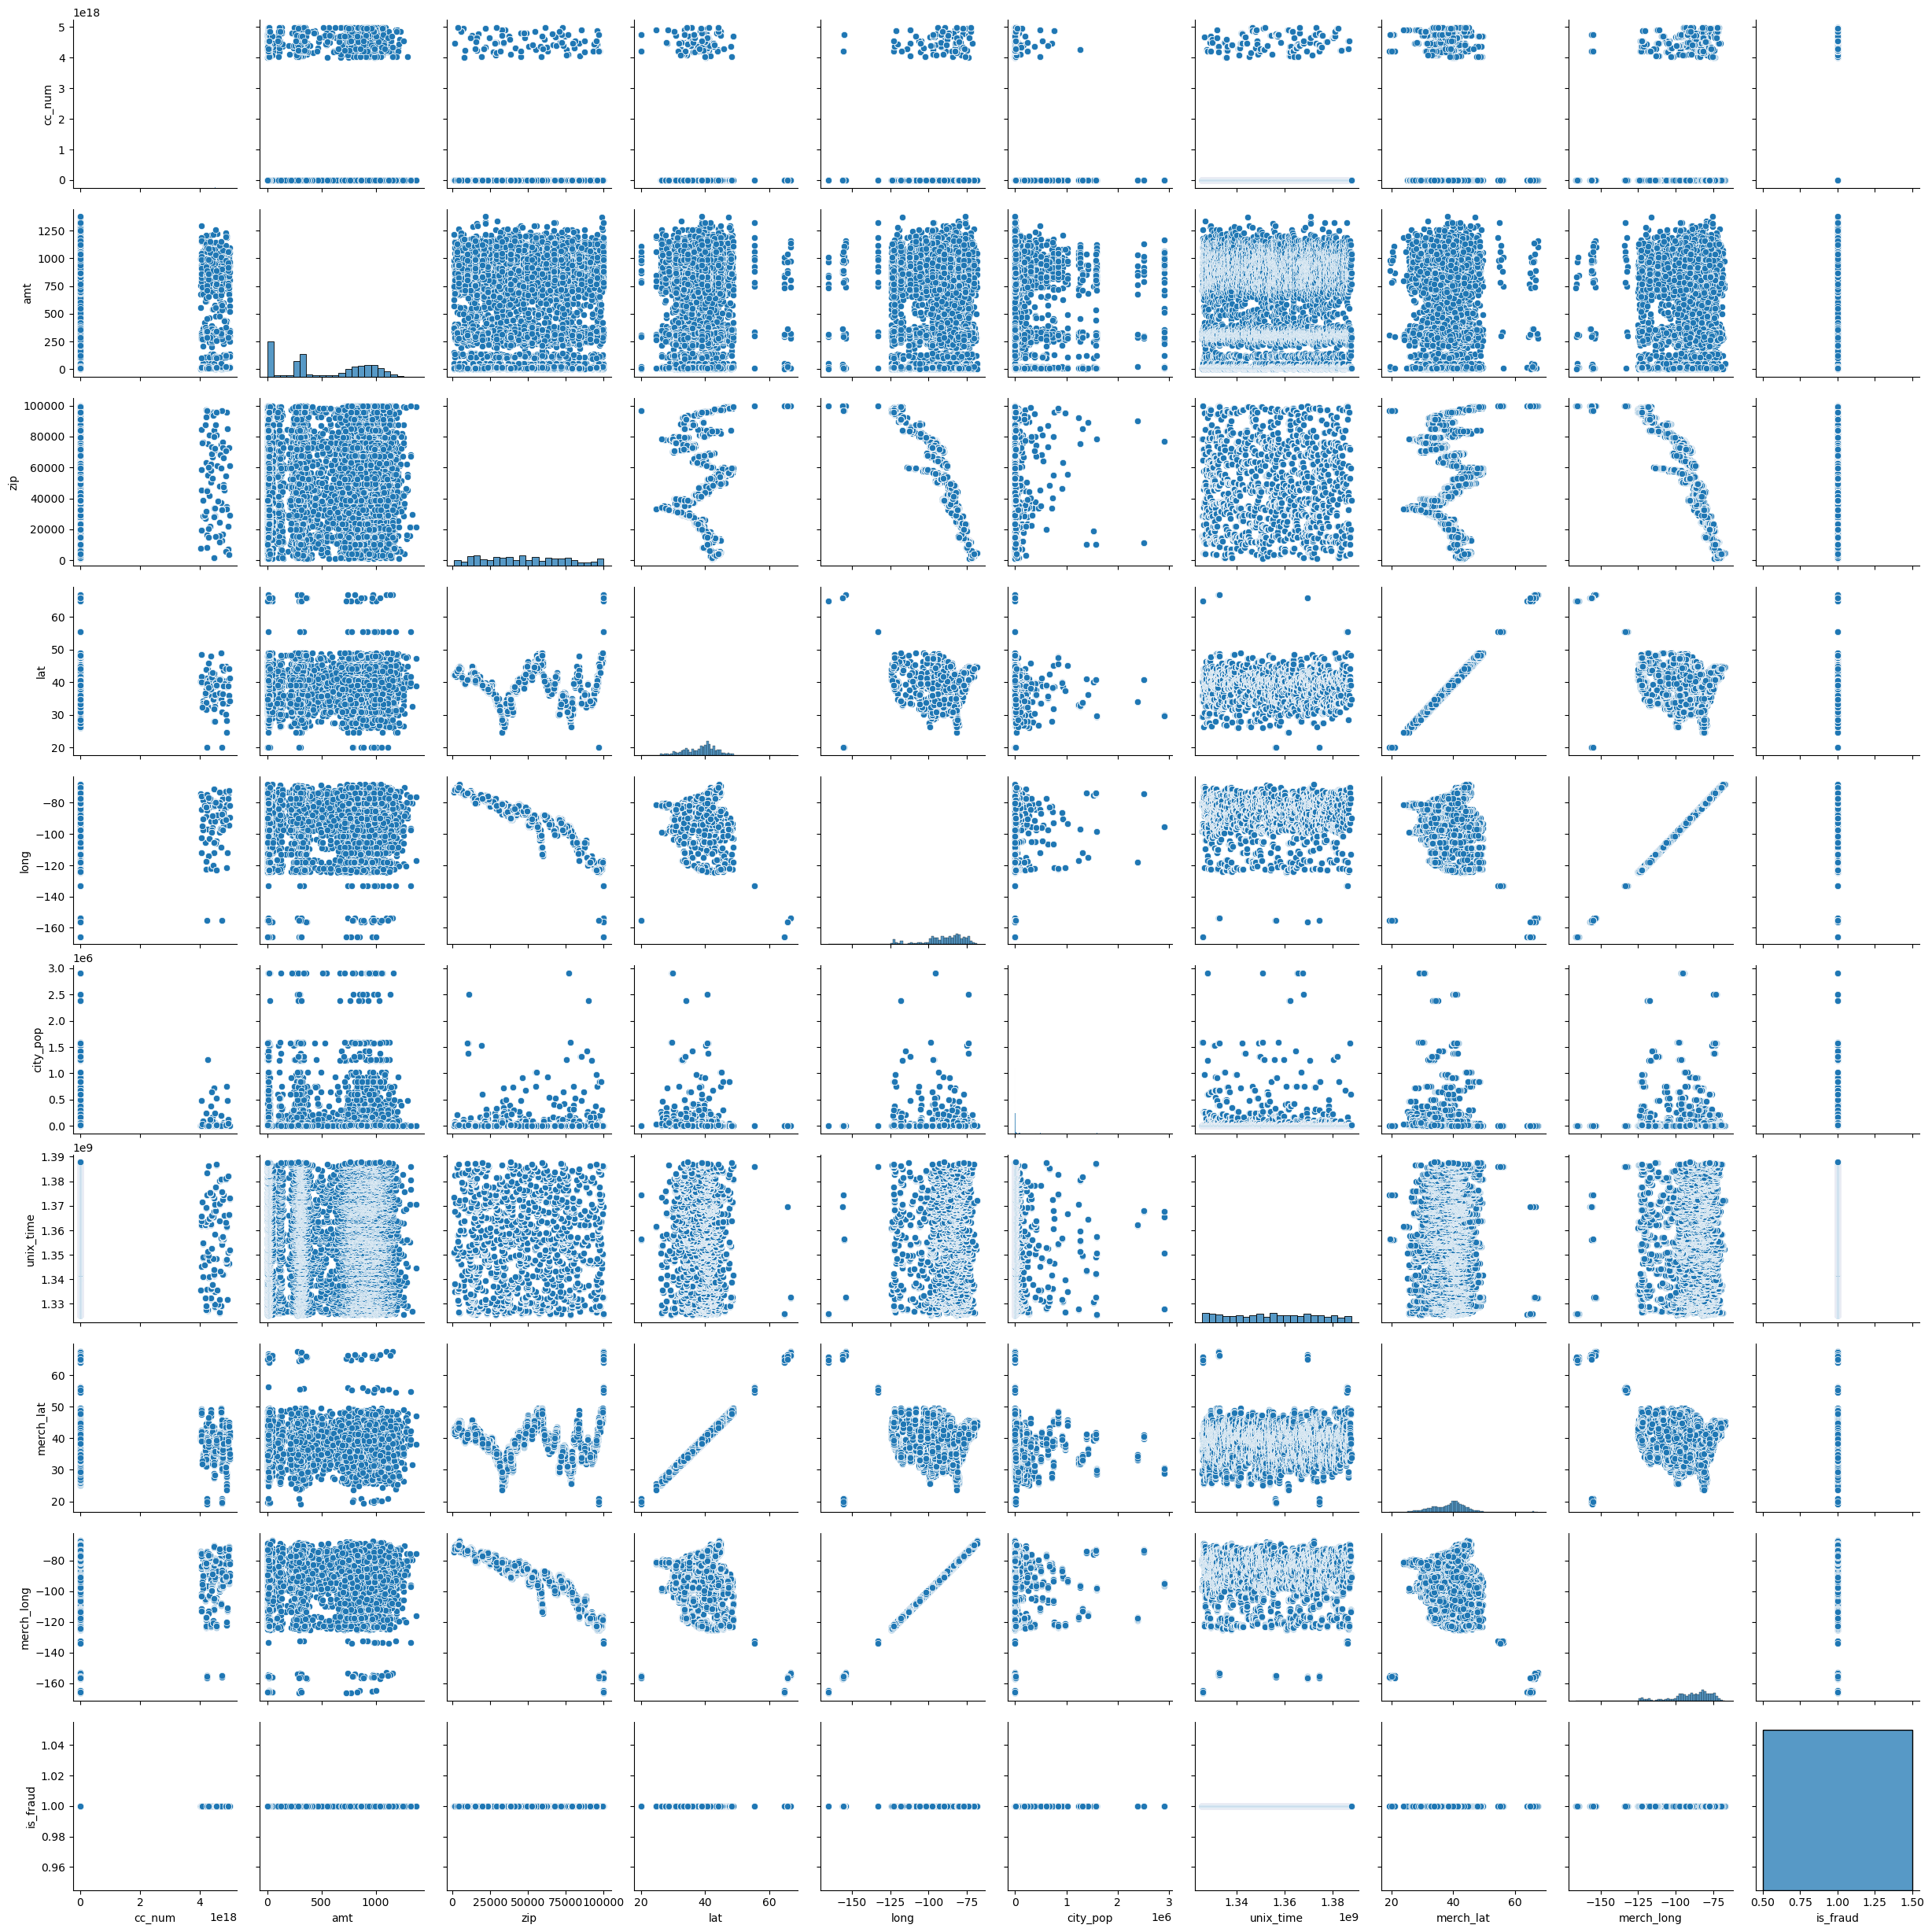

In [83]:
sns.pairplot(
    df[df.is_fraud==1]
)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    object        
 17  trans_num              object        
 18  unix_time             

In [15]:
np.iinfo('float64')

ValueError: Invalid integer data type 'f'.